# Common Questions

Here, I answer questions from published [here](https://huyenchip.com/ml-interviews-book/contents/) in preparation for my interviews. I also include other questions.

## Vectors

1. Dot product
   1. [E] What’s the geometric interpretation of the dot product of two vectors?
   2. [E] Given a vector , find vector of unit length such that the dot product of u and v is maximum.
2. Outer product
   1. [E] Given two vectors a=[3,2,1] and b=[-1,0,1]. Calculate the outer product $a^T b$?
   2. [M] Give an example of how the outer product can be useful in ML.
   3. [E] What does it mean for two vectors to be linearly independent?
3. [M] Given two sets of vectors $A = a_1, a_2, ..., a_n$ and $B = b_1, b_2, ..., b_n$. How do you check that they share the same basis?
4. [M] Given n vectors, each of d dimensions. What is the dimension of their span?
5. Norms and metrics
   1. [E] What's a norm? What is $L_0, L_1, L_2, L_{norm}$?
   2. [M] How do norm and metric differ? Given a norm, make a metric. Given a metric, can we make a norm?

1.1 Dot product finds the length of the projection of x onto y



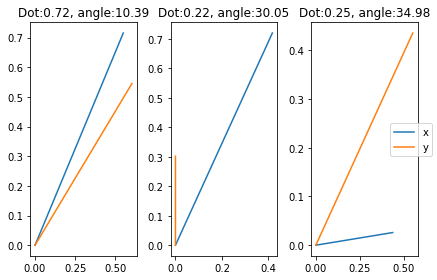

1.2 The maximum dot product is found when the lines are parallel.

2.1 Calculate elementwise product (notated with "X⊗Y")

x [3 2 1]
y [-1  0  1]
X⊗Y = [[-3  0  3]
 [-2  0  2]
 [-1  0  1]]
2.2 Cross products can be used to analyze pairwise correlations

3. Linearly independent vectors have dot(x,y)=0 because angle=90. In terms of eigenvectors/eigenvalues, if the eigenvalue of the matrix is zero, the eigenvector is linearly dependent.

Dependent:  [[0 1 1 0]]
4. Confirm independence.
5. The span is the same dimension as the basis. It is generated from linear combinations of the basis vectors.
6. L0 reports the number of incorrect responses. For instance, if 1 answer is reported incorrect out of 5 questions, then the L0 is 1.
  L1 is manhattan distance and is described as the sum of absolutes.
  L2 is euclidean distance and is described as the square root of the sum of squares.
  L-infinity reports the largest magnitud among each element of a vector. In the analogy of construction, by mi

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print("""1.1 Dot product finds the length of the projection of x onto y
""")

num_iter = 3

fig, axs = plt.subplots(1,num_iter)
for seed, ax in zip(range(num_iter), axs):
    np.random.seed(seed)
    
    n=2
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)

    # Dot product finds the length of the projection of x onto y
    dot = np.sum(x.T*y) # or  np.dot(x,y)

    x_mag = np.sqrt(np.sum(np.square(x)))
    y_mag = np.sqrt(np.sum(np.square(y)))
    angle = np.arccos(dot / (x_mag * y_mag)) * 360 / (2 * np.pi)

    ax.plot([0,x[0]], [0,x[1]], label='x')
    ax.plot([0,y[0]], [0,y[1]], label='y')
    ax.set_title(f"Dot:{round(dot,2)}, angle:{round(angle,2)}")

handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center right')
plt.tight_layout()
plt.show()

print("""1.2 The maximum dot product is found when the lines are parallel.
""")


print("""2.1 Calculate elementwise product (notated with "X⊗Y")
""")
x = np.array([3,2,1])
y = np.array([-1,0,1])
print('x', x), print('y', y)
print('X⊗Y =', np.multiply.outer(x.T,y))

print("""2.2 Cross products can be used to analyze pairwise correlations
""")

print("""3. Linearly independent vectors have dot(x,y)=0 because angle=90. In terms of eigenvectors/eigenvalues, if the eigenvalue of the matrix is zero, the eigenvector is linearly dependent.
""")

import numpy as np

matrix = np.array(
    [
        [0, 1 ,0 ,0],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]
    ])

lambdas, V =  np.linalg.eig(matrix.T)
# The linearly dependent row vectors 
print("Dependent: ", matrix[lambdas == 0,:])

print("4. Confirm independence.")

print("5. The span is the same dimension as the basis. It is generated from linear combinations of the basis vectors.")

print("6. L0 reports the number of incorrect responses. For instance, if 1 answer is reported incorrect out of 5 questions, then the L0 is 1.")

print("  L1 is manhattan distance and is described as the sum of absolutes.")
print("  L2 is euclidean distance and is described as the square root of the sum of squares.")
print("  L-infinity reports the largest magnitud among each element of a vector. In the analogy of construction, by minimizing the L-infinity, we are reducing the cost of the most expensive building.")

print("""\nMetrics d(u,v) induced by a vector space norm has additional properties that are not true of general metrics, namely: 
1. Translation Invariance: d(u+w, v+w) = d(u,v)
2. Scaling property: for any real number t, d(tu,tv) = |t| d(u,v)
Conversely, if a metric has the above properties, then d(u,0) is a norm. In other words, a metric is a function of two variables while a norm is a function of one variable.
""")


## Matrices

**1. Why do we say that matrices are linear transformations?**

Matrices, when multiplied with a vector (for instance) cause a linear transformation on that vector. 

$$
T(\mathbf{v}) = M \mathbf{v} = M \begin{bmatrix}x\\y\\\end{bmatrix} = \begin{bmatrix}a&b\\c&d\\\end{bmatrix} \begin{bmatrix}x\\y\\\end{bmatrix} = \begin{bmatrix}ax+by\\cx+dy\\\end{bmatrix}
$$

Matrices give us a powerful systematic way to describe a wide variety of transformations: they can describe rotations, reflections, dilations, and much more

**2. What's the inverse of a matrix? Do all matrices have an inverse? Is the inverse of a matrix always unique?**

$A^{-1} A = A A^{-1} = I$ descibes a matrix $A$ that, when multiplied by its inverse $A^{-1}$, generates the identity matrix. Matrices are invertible when they have a nonzero determinant, nonzero eigenvalues, trivial nullspace (only zeros), and full rank (rank = dimension). By, $A=AI=A(CB)=(AC)B=IB=B$, where $A$ and $B$ are square matrices with the same inverse $C$, an inverse of a matrix is always unique.

**3. What does the determinant of a matrix represent?**

Factor of deformation caused by the transformation. A determinant of zero "squashes" the parallelpiped, in other words, this matrix is singular.

**4. What happens to the determinant of a matrix if we multiply one of its rows by a scalar  $t\times R$ ?**

* $\det (kA) = k^n \det(A)$ where A is an $n \times n$ matrix
* Also, If a matrix $A$ has a row that is all zeros, then $\det A = 0$

**5. A $4 \times 4$ matrix has four eigenvalues $3,3,2,−1$. What can we say about the trace and the determinant of this matrix?**

Trace is the sum of the eigenvalues of a matrix.
Product of eigenvalues of a matrix is equal to the value of the determinant of a matrix. 

**6. Given the following matrix:**
$$\begin{bmatrix}
1&4&-2\\
-1&3&2\\
3&5&-6\\
\end{bmatrix}$$
**Without explicitly using the equation for calculating determinants, what can we say about this matrix’s determinant? Hint: rely on a property of this matrix to determine its determinant.**

This matrix has dependent columns, so we know that the determinant is zero. This is true because a matrix whose column vectors are linearly dependent will have a zero row show up in its reduced row echelon form, which means that a parameter in the system can be of any value you like.

**7. What's the difference between the covariance matrix $A^T A$ and the Gram matrix $AA^T$ ? Given  $A \in R^{n\times m}$ and $b \in R^n$.**

$A A^T$ is a $m \times m$ matrix 

$A^T A$ is a $n \times n$ matrix and resembles the covariance.

**i. Find  $x$  such that:  $Ax=b$ .**

$Ax = b$

$A^{-1} A x = A^{-1} b$

$I x = A^{-1} B$

$x = A^{-1} B$

**ii. When does this have a unique solution?**

When A is invertible.

**iii. Why is it when A has more columns than rows,  Ax=b  has multiple solutions?**

The most condensed solution will still be a function of multiple columns, meaning multiple solutions will exist.

**iv. Given a matrix A with no inverse. How would you solve the equation  Ax=b ? What is the pseudoinverse and how to calculate it?**

https://www.omnicalculator.com/math/pseudoinverse

**8. Derivative is the backbone of gradient descent.**

**i. What does derivative represent?**

Speed of change.

**ii. What’s the difference between derivative, gradient, and Jacobian?**

Gradient: multivariate derivatives

$$\triangledown f = \begin{bmatrix}
\frac{\delta f(x_1, x_2, x_3)}{\delta x_1} & \frac{\delta f(x_1, x_2, x_3)}{\delta x_2} & \frac{\delta f(x_1, x_2, x_3)}{\delta x_3} \\
\end{bmatrix}$$

Jacobian: vector-valued derivatives

$$J = \begin{bmatrix}
\frac{d f_1}{d x_1} & ... & \frac{d f_1}{d x_n}\\
\vdots & \ddots & \vdots\\
\frac{d f_n}{d x_1} & ... & \frac{d f_n}{d x_n}\\
\end{bmatrix}$$

As a note, the Hessian is the derivative of the Jacobian.

**8. Say we have the weights  w∈Rd×m  and a mini-batch  x  of  n  elements, each element is of the shape  1×d  so that  x∈Rn×d . We have the output  y=f(x;w)=xw . What’s the dimension of the Jacobian  δyδx ?**



1.  Given a very large symmetric matrix A that doesn’t fit in memory, say  A∈R1M×1M  and a function  f  that can quickly compute  f(x)=Ax  for  x∈R1M . Find the unit vector  x  so that  xTAx  is minimal. Hint: Can you frame it as an optimization problem and use gradient descent to find an approximate solution?

## Linear regression

**1. Derive the least squares solution.**

$$\begin{align*}
RSS &= (Y-X\beta)^T (Y-X\beta)\\
       &= (Y^T - \beta^T X^T)(Y-X\beta)\\
       &= Y^T Y 
          - Y^T X \beta 
          - \beta^T X^T Y
          + \beta^T X^T X \beta\\
\end{align*}
$$

Differentiate wrt $\beta$ to minimize...
$$\begin{align*}
0  &= - X^T Y
      - X^T Y
      + 2X^T X \beta\\
   &= -2 X^T Y + 2X^T X \beta\\
   &= - X^T Y + X^T X \beta\\
   &= X^T ( -Y + X\beta )\\
   &= X^T ( Y - X\beta )\\
\end{align*}
$$

This is a common solution. But, to solve for $\beta$, we can backtrack a little...

$$\begin{align*}
0 &= - X^T Y + X^T X \beta\\
\beta &= X^T Y/ ( X^T X )\\
\end{align*}
$$

**2. Prove that** $X$ and $\epsilon$ **are independent**

We do this by proving $X \perp \epsilon$. In other words, $X^T \epsilon = 0$ where $X$ is $p\times n$ and $\epsilon$ is $n \times 1$

$$\begin{align*}
X^T \epsilon &= X^T (I - H) y\\
 &= X^T y - X^T H y\\
 &= X^T y - X^T X (X^T X)^{-1} X^T y\\
 &= X^T y - X^T y\\
 &= 0\\
\end{align*}$$

**While here, we should also prove that** $\epsilon$ and $\hat{y}$ **are independent**

$$\begin{align*}
\epsilon \times \hat{y} &= \epsilon \times \hat{y}^T\\
&= (y - \hat{y}) \hat{y}^T\\
&= (I - H) y \hat{y}^T\\
&= (I - H) \epsilon \epsilon^T H\\
&= (I - H) H\\
&= HH - H = 0\\
\end{align*}$$

assuming $\epsilon \epsilon^T = \sigma_\epsilon^2 I$ where $\epsilon \sim N(0,1)$ and knowing that $H$ is idopotent $HH = H$.

**3. Prove ANOVA** $SST = SSE + SSR$

$$\begin{align*}
SST &= \sum_{i=1}^n (y_i - \bar{y})^2\\
 &= \sum_{i=1}^n (y_i - \hat{y}_i + \hat{y}_i - \bar{y})^2\\
 &= \sum_{i=1}^n (y_i - \hat{y}_i)^2  + 2 \sum_{i=1}^n (y_i - \hat{y}_i) (\hat{y}_i - \bar{y}) + \sum_{i=1}^n (\hat{y}_i - \bar{y})^2\\
 &= SSR + SSE + 2 \sum_{i=1}^n (y_i - \hat{y}) (\hat{y}_i - \bar{y})\\
\end{align*}$$

We know $2 \sum_{i=1}^n (y_i - \bar{y}) (\hat{y}_i - \bar{y}) = 0$ because

$\sum_{i=1}^n (y_i - \hat{y}_i) (\hat{y}_i - \bar{y}) = \sum_{i=1}^n \hat{y}_i (y_i  - \hat{y}_i) - \bar{y}_i \sum_{i=1}^n (y_i - \hat{y}_i) = 0 - 0 = 0$

We know $$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

As a note, the adjusted $R^2$ is $$R^2_{adj} = 1 - \frac{SSE/(N-p-1)}{SST/(N-1)} = 1 - \frac{(1 - R^2)(N-1)}{(N-p-1)}$$

**4. Given the standard deviation of residuals** ($\hat{\sigma}^2$), find $RSS$:

$$RSE = \sqrt{\frac{RSS}{N-p-1}}$$

$$\hat{\sigma}^2 = RSE^2$$

**5. Given F, p, and n, find** $R^2$

$$
\begin{align*}
    F &= \frac{SSR/p}{SSE/(n-p-1)}\\
    &= \frac{(SST - SSE)/p}{SSE/(n-p-1)}\\
    F \frac{p}{n-p-1}&= \frac{SST-SSE}{SSE}\\
    1 + F \frac{p}{n-p-1}&= \frac{SST}{SSE}\\
    1 - (1 + F \frac{p}{n-p-1})^{-1}&= 1-\frac{SSE}{SST} = R^2\\
\end{align*}
$$

**6. In the R output below, how are the terms calculated?**

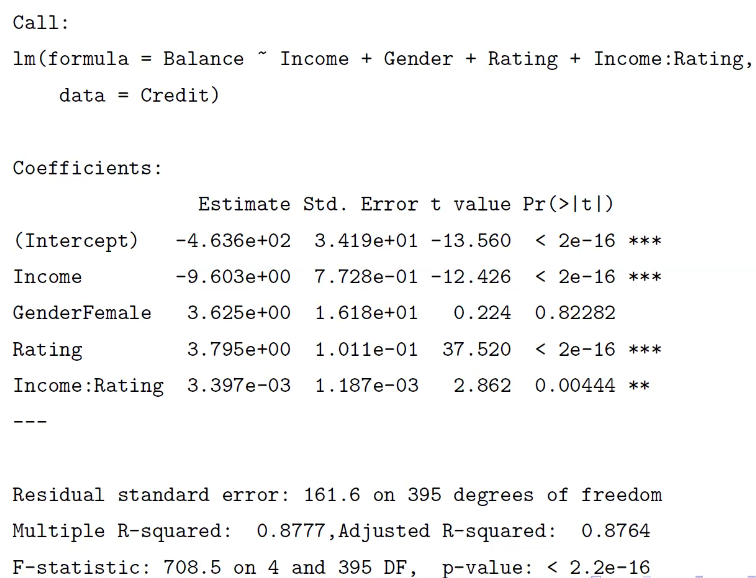

In [1]:
from utils import disp
disp('example_OLS_output.png')

The **estimate** is calculated through ordinary least squares (closed form derivation shown above).

The **std. error** is $\sqrt{\widehat{Var}(\hat{\beta}_j)}$ where $\hat{\beta}_j$ is the LS estimator of $\beta_j$, $Var(\hat{\beta}_j) = \frac{\sigma_\epsilon^2}{X^\prime X}$ (proof below) is the variability of the coefficients (as new data points are added). We use $\widehat{Var}$ instead of $Var$ because we are estimating the sampling variability; things like the gaussian noise can be unknown quanitites and, therefore, the variance must be estimated.

The **t-value** is the **estimate** divided by the **std. error**

The **p-value** $Pr(>|t|)$ is a table lookup; We find the p-value on the t distribution with DF $N-p-1$ and **t-value**.

The **residual standard error** is $RSE = \sqrt{\frac{RSS}{N-p-1}}$. Note, we can find $RSS$ using the information on this line. Additionally, if we square this value, we receive the variance of the residuals according to $\hat{\sigma}^2 = RSE^2$.

The **R-square** value is described as the total amount of variance explained by the model, or $SSR / SST$. 

The **adjusted R-square** is calculated as a function of the $R^2$: .

The **F-statistic** is a "global" test that checks if at least one of your coefficients are nonzero.

Because $F \sim F_{p, N - p - 1}$, the p-value is estimated as $Pr(F_{p, N - p - 1} \geq F)$.

**7. Prove** $Var[\hat{\beta}] = \frac{\sigma_\epsilon^2}{X^\prime X}$

We know that 

$$\begin{align*}
Var(X) = E[Var(X|Y)] + Var[E(X|Y)]
\end{align*}$$

$$Var(\hat{\beta}) = E[Var(\hat{\beta}|X)] + Var[E(\hat{\beta}|X)]$$

Knowing OLS is unbiased, $E(\hat{\beta}|X) = \beta$, and therefore $Var[E(\hat{\beta}|X)] = 0$ and that $\beta$ is a constant so 

$$\begin{align*}
Var(\hat{\beta}) &= E[Var(\hat{\beta}|X)]\\
&= E[\sigma (X^\prime X)^{-1}]
\end{align*}$$

To prove this last step, 

$$
\textrm{Var}(\hat{\mathbf{\beta}}) =
(\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime}
\; \sigma^2 \mathbf{I} \; \mathbf{X} (\mathbf{X}^{\prime} \mathbf{X})^{-1}
= \sigma^2 (\mathbf{X}^{\prime} \mathbf{X})^{-1}
$$

Using this, Let $\mathbf{x}_j$ be the $j^{th}$ column of $\mathbf{X}$, and $\mathbf{X}_{-j}$ be the $\mathbf{X}$ matrix with the $j^{th}$ column removed.

$$
\textrm{Var}(\hat{\mathbf{\beta}}_j) =
\sigma^2 [\mathbf{x}_j^{\prime} \mathbf{x}_j - \mathbf{x}_j^{\prime}
\mathbf{X}_{-j} (\mathbf{X}_{-j}^{\prime} \mathbf{X}_{-j})^{-1}
\mathbf{X}_{-j}^{\prime} \mathbf{x}_j]^{-1}
$$

From here, Let $\mathbf{x_1}$ be the $1$st column of $X$. Let $X_{-1}$ be the matrix $X$ with the $1$st column removed.

Consider the matrices:

$$
\begin{align*}
A &= \mathbf{x_1}'\mathbf{x_1}\quad \quad     &\text{1 by 1 matrix}\\
B &= \mathbf{x_1}'X_{-1} \quad         &\text{1 by n-1 matrix}\\
C &= X_{-1}\mathbf{x_1} & \text{n-1 by 1 matrix} \\
D &= X_{-1}'X_{-1} & \text{n-1 by n-1 matrix}
\end{align*}
$$

Observe that:

$$X'X = \begin{bmatrix}A & B \\C & D \end{bmatrix}$$

By the matrix inversion lemma (and under some existence conditions):

$$\left(X'X \right)^{-1} = \begin{bmatrix}\left(A - BD^{-1}C \right)^{-1} & \ldots \\ \ldots & \ldots \end{bmatrix}$$

Notice the 1st row, 1st column of $(X'X)^{-1}$ is given by the [Schur complement][1] of block $D$ of the matrix $X'X$

$$\left(A - BD^{-1}C \right)^{-1}$$


  [1]: https://en.wikipedia.org/wiki/Schur_complement

**8. Derive the ridge regression beta in closed form**

It suffices to modify the loss function by adding the penalty. In matrix terms, the initial quadratic loss function becomes
$$ (Y - X\beta)^{T}(Y-X\beta) + \lambda \beta^T\beta$$

Expanding the RSS

$$\begin{align*}
RSS &= (Y-X\beta)^T (Y-X\beta) + \lambda \beta^T\beta\\
       &= (Y^T - \beta^T X^T)(Y-X\beta)\\
       &= Y^T Y 
          - Y^T X \beta 
          - \beta^T X^T Y
          + \beta^T X^T X \beta
          + \lambda \beta^T\beta\\
\end{align*}
$$

Differentiate wrt $\beta$ to minimize...
$$\begin{align*}
0  &= - X^T Y
      - X^T Y
      + 2X^T X \beta
      + 2 \lambda \beta\\
   &= -2 X^T Y + 2X^T X \beta + 2 \lambda \beta\\
   X^T Y &= (X^T X + \lambda I) \beta\\
\end{align*}
$$

Therefore, the ridge estimator is 

$$\beta = \frac{X^T Y}{X^T X + \lambda I}$$

As a note, assuming orthonormality of the design matrix implies $X^T X = I = (X^T X)^{-1}$. So, the ridge estimator can be defined as $\hat{\beta}(\lambda)_{ridge} = (1 + \lambda)^{-1} \hat{\beta}_{OLS}$.

Also, bias increases with $\lambda$ (bc more sparse model) and variance decreases with $\lambda$ (bc more sparse model). So, what happens to the MSE of ridge?

**9. Compare the MSE of ridge regression and OLS**

OLS minimizes MSE so it will have a smaller MSE than ridge regression. 

## Dimensionality reduction

**1. Why do we need dimensionality reduction?**

Remove collinearity & multicollinearity, and save storage & computation time.

**2. Eigendecomposition is a common factorization technique used for dimensionality reduction. Is the eigendecomposition of a matrix always unique?**

No. If multiple eigenvalues are the same, then decomposition is not unique. 

**3. Name some applications of eigenvalues and eigenvectors.**

Singular value decomposition (SVD),  $A = U D V^T$, is more general than eigendecomposition. Every real matrix has a SVD

In [8]:
# Singular-value decomposition
import numpy as np
from scipy.linalg import svd
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
A = A - np.mean(A,0)
print("A\n",A)

# Eigendecomposition
co=np.cov(A.T)
[D,UI]=np.linalg.eigh(co)
print("UI",UI)

# SVD
U, s, VT = svd(A)
print("U, left-singular vectors of A\n", U)
print("Singular values of original matrix A\n", s)
print("V, right-singular vectors of A\n", VT)

A
 [[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
UI [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
U, left-singular vectors of A
 [[-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]]
Singular values of original matrix A
 [4. 0.]
V, right-singular vectors of A
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


**4. We want to do PCA on a dataset of multiple features in different ranges. For example, one is in the range 0-1 and one is in the range 10 - 1000. Will PCA work on this dataset?**

Normalization is important in PCA since it is a variance maximizing exercise. On larger scales, the variance is naturally larger. So, the wrong feature combinations might be chosen.

**5. Under what conditions can one apply eigendecomposition? What about SVD?**

https://math.stackexchange.com/a/365020/752105

**i. What is the relationship between SVD and eigendecomposition?**

**ii. What’s the relationship between PCA and SVD?**


**6. How does t-SNE (T-distributed Stochastic Neighbor Embedding) work? Why do we need it?**

https://towardsdatascience.com/t-distributed-stochastic-neighbor-embedding-t-sne-bb60ff109561

An unsupervised, randomized algorithm, used only for visualization
Applies a non-linear dimensionality reduction technique where the focus is on keeping the very similar data points close together in lower-dimensional space.
Preserves the local structure of the data using student t-distribution to compute the similarity between two points in lower-dimensional space.
t-SNE uses a heavy-tailed Student-t distribution to compute the similarity between two points in the low-dimensional space rather than a Gaussian distribution, which helps to address the crowding and optimization problems.
Outliers do not impact t-SNE.

Step 1: Find the pairwise similarity between nearby points in a high dimensional space.

Step 2: Map each point in high dimensional space to a low dimensional map based on the pairwise similarity of points in the high dimensional space.

Step 3: Find a low-dimensional data representation that minimizes the mismatch between Pᵢⱼ and qᵢⱼ using gradient descent based on Kullback-Leibler divergence(KL Divergence)

Step 4: Use Student-t distribution to compute the similarity between two points in the low-dimensional space.

PCA is deterministic, whereas t-SNE is not deterministic and is randomized.
t-SNE tries to map only local neighbors whereas PCA is just a diagonal rotation of our initial covariance matrix and the eigenvectors represent and preserve the global properties

## Statistics

**1. Explain frequentist vs. Bayesian statistics.**

I have misplaced my phone somewhere in the home. I can use the phone locator on the base of the instrument to locate the phone and when I press the phone locator the phone starts beeping.

Problem: Which area of my home should I search?

**Frequentist Reasoning**

I can hear the phone beeping. I also have a mental model which helps me identify the area from which the sound is coming. Therefore, upon hearing the beep, I infer the area of my home I must search to locate the phone.

**Bayesian Reasoning**

I can hear the phone beeping. Now, apart from a mental model which helps me identify the area from which the sound is coming from, I also know the locations where I have misplaced the phone in the past. So, I combine my inferences using the beeps and my prior information about the locations I have misplaced the phone in the past to identify an area I must search to locate the phone.

So, prior beliefs ($f(p)$) get updated with new data! This follows human thinking! However, it is sometimes hard to define the priors.

**2. Given the array , find its mean, median, variance, and standard deviation.**

mean $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$

variance $s^2 = \frac{1}{n-1} \sum_{i=1}^n (x - \bar{x})^2$

**3. When should we use median instead of mean? When should we use mean instead of median?**

Median is more robust to outliers. Mean is tractible.

**4. What is a moment of function? Explain the meanings of the zeroth to fourth moments.**

A moment $M_X(t) = E(e^{tX})$ of a distribution about a number is the expected value of the $n$th power of the deviations about that number. It's a good trick for calculating the properties of a distribution.

n = 0, moment = 1 because the AUC of PDF must be 1.

n = 1 and centered about origin, $E(X)$

n = 2 and centered about mean, the variance $Var(X) = E((X-\mu)^2)$

n = 3 and centered about mean, the skewness $E((X-\mu)^3)$

n = 4 and centered about mean, the kurtosis $E((X-\mu)^4)$

**5. Are independence and zero covariance the same? Give a counterexample if not.**

Independence does not mean a zero covariance. For instance, let $X$ be a random variable that is $−1$ or $+1$ with probability $0.5$. Then let $Y$ be a random variable such that $Y=0$ if $X=-1$ and $Y$ is randomly $-1$ or $+1$ with probability $0.5$ if $X=1$. Clearly, $X$ and $Y$ are dependent (since knowing $Y$ allows me to perfectly know $X$), but their covariance is zero. They both have zero mean, and 

$$E[XY] = \begin{align*}
& (-1) * 0 * P(X=-1)\\
&+ 1 * 1 * P(X=1, Y=1)\\
&+ 1 * (-1) * P(X=1, Y=-1)\\
\end{align*} = 0
$$

Or more generally, take any distribution $P(X)$ and any $P(Y|X)$ such that $P(Y=a|X)=P(Y=−a|X)$ for all $X$ (i.e., a joint distribution that is symmetric around the $x$ axis), and you will always have zero covariance. But you will have non-independence whenever $P(Y|X)\neq P(Y)$; i.e., the conditionals are not all equal to the marginal. Or ditto for symmetry around the $y$ axis.

Another example is: Take a random variable $X$ with $EX=0$ and $EX^3=0$, e.g. normal random variable with zero mean. Take Y=X2. It is clear that $X$ and $Y$ are related, but

$$cov(X,Y)=EXY−EX*EY=EX^3=0$$

Summary of ML implementations on Kaggle: https://www.kaggle.com/shivamb/data-science-glossary-on-kaggle
